# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Fadilah Rusydan
- **Email:** fadil.dicoding@gmail.com
- **ID Dicoding:** fadil-dicoding

## Menentukan Pertanyaan Bisnis

1. Apa kategori produk yang paling banyak dibeli?
2. Bagaimana distribusi waktu pengiriman dibandingkan dengan estimasi waktu pengiriman?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

customers = pd.read_csv('/content/drive/My Drive/notebooks/dataset/customers_dataset.csv')
geolocation = pd.read_csv('/content/drive/My Drive/notebooks/dataset/geolocation_dataset.csv')
order_items = pd.read_csv('/content/drive/My Drive/notebooks/dataset/order_items_dataset.csv')
order_payments = pd.read_csv('/content/drive/My Drive/notebooks/dataset/order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/drive/My Drive/notebooks/dataset/order_reviews_dataset.csv')
orders = pd.read_csv('/content/drive/My Drive/notebooks/dataset/orders_dataset.csv')
product_category_translation = pd.read_csv('/content/drive/My Drive/notebooks/dataset/product_category_name_translation.csv')
products = pd.read_csv('/content/drive/My Drive/notebooks/dataset/products_dataset.csv')
sellers = pd.read_csv('/content/drive/My Drive/notebooks/dataset/sellers_dataset.csv')

data = {'products': products,
        'category': product_category_translation,
        'payments': order_payments,
        'orders': orders,
        'items': order_items,
        'customers': customers,
        'reviews': order_reviews,
        'sellers': sellers,
        'geolocation': geolocation}

Mounted at /content/drive


In [3]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [4]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [5]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Assessing Data

In [8]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
data['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Cleaning Data

In [12]:
# Merge datasets and clean
merged_data = pd.merge(order_items, orders, on='order_id', how='inner')
merged_data = pd.merge(merged_data, products, on='product_id', how='inner')
merged_data = pd.merge(merged_data, product_category_translation, on='product_category_name', how='left')
merged_data = merged_data.drop_duplicates()
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   customer_id                    112650 non-null  object 
 8   order_status                   112650 non-null  object 
 9   order_purchase_timestamp       112650 non-null  object 
 10  order_approved_at              112635 non-null  object 
 11  order_delivered_carrier_date   111456 non-null  object 
 12  order_delivered_customer_date 

## Exploratory Data Analysis (EDA)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-14-9d2a9460e583>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')


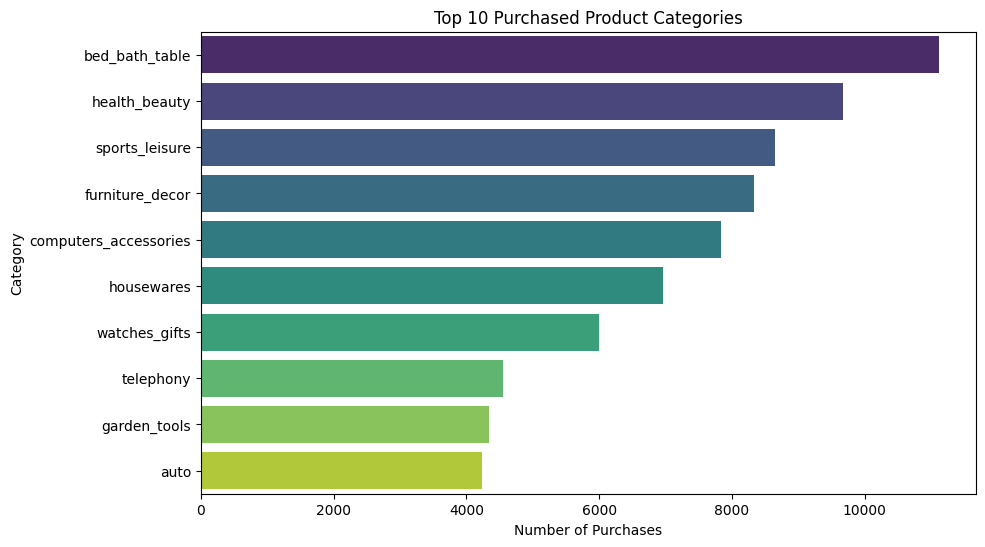

In [14]:
# Question 1: Most purchased product categories
category_counts = merged_data['product_category_name_english'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Top 10 Purchased Product Categories')
plt.xlabel('Number of Purchases')
plt.ylabel('Category')
plt.show()

### Pertanyaan 2:

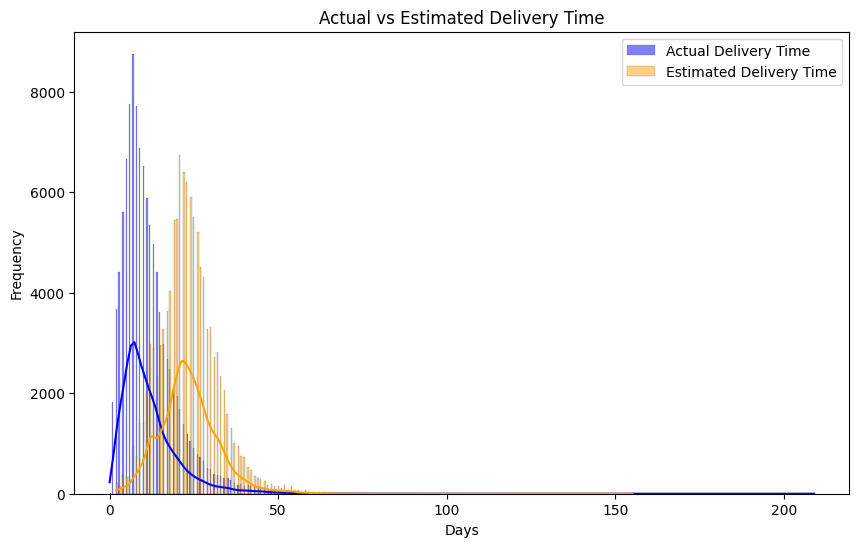

In [15]:
# Question 2: Delivery time vs estimated time
merged_data['delivery_time'] = (
    pd.to_datetime(merged_data['order_delivered_customer_date']) -
    pd.to_datetime(merged_data['order_purchase_timestamp'])
).dt.days
merged_data['estimated_time'] = (
    pd.to_datetime(merged_data['order_estimated_delivery_date']) -
    pd.to_datetime(merged_data['order_purchase_timestamp'])
).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(merged_data['delivery_time'], color='blue', kde=True, label='Actual Delivery Time')
sns.histplot(merged_data['estimated_time'], color='orange', kde=True, label='Estimated Delivery Time')
plt.legend()
plt.title('Actual vs Estimated Delivery Time')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

**Insight:**
Pertanyaan 1: Apa kategori produk yang paling banyak dibeli?
- Berdasarkan visualisasi, kategori bed_bath_table adalah yang paling banyak dibeli, diikuti oleh kategori health_beauty dan sports_leisure.
- Hal ini menunjukkan bahwa kebutuhan rumah tangga dan produk kesehatan serta kecantikan menjadi prioritas utama pelanggan dalam pembelian.

Pertanyaan 2: Bagaimana distribusi waktu pengiriman dibandingkan dengan estimasi waktu pengiriman?
- Visualisasi menunjukkan bahwa:
- Waktu pengiriman aktual (biru) sebagian besar berada dalam rentang waktu yang lebih singkat dibandingkan dengan estimasi waktu pengiriman (oranye).
- Sebagian besar pesanan dikirim lebih cepat daripada waktu estimasi.
- Namun, terdapat beberapa kasus outlier di mana waktu pengiriman aktual jauh lebih lama dari estimasi yang diberikan.

## Conclusion

- Conclution pertanyaan 1: Berdasarkan visualisasi, kategori bed_bath_table adalah yang paling banyak dibeli, diikuti oleh kategori health_beauty dan sports_leisure.
- Conclution pertanyaan 2: Waktu pengiriman aktual (biru) sebagian besar berada dalam rentang waktu yang lebih singkat dibandingkan dengan estimasi waktu pengiriman (oranye).